In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing all the required libraies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout

### **`Importing raw file `**

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/City Furnish/LOB B2C /stock.move.line (10).xlsx')

In [ ]:
df

,ID,Date,Reference,Product,Lot/Serial Number,Sale order ID,LOB,Warehouse Code,Created on,Last Updated on,...,SO / PO number,LOB2,Movement Type,Reserved,Lot/Serial Number Name,From,To,Real Reserved Quantity,Done,Status
0,__export__.stock_move_line_28758_e7ef053d,2021-03-28 10:10:00,BAN/OUT/02138,# Premium Foam Mattress Queen 78X60X4,XXOTP4LT19061641,ON-RET-BAN-14402,B2C,BAN,2021-03-28 10:10:00,2024-01-22 16:09:39,...,ONRETBAN14402,NaN,Out,0,NaN,BAN/Stock,Partner Locations/Customers,0,1,done
1,__export__.stock_move_line_38545_3cb4ae91,2021-10-19 11:33:00,BAN/OUT/02474,# Erica 3 Seater Sofa,FUMYGB19110373,ON-RET-BAN-16891-PP,B2C,BAN,2021-10-19 11:33:00,2023-08-27 13:49:10,...,ONRETBAN16891,NaN,Out,0,NaN,BAN/Stock,Partner Locations/Customers,0,1,done
2,__export__.stock_move_line_39409_c2267285,2021-06-16 14:42:00,BAN/OUT/02541,# Ergonomic Chair,FU6PNJ20091524,ON-RET-BAN-15187-OU,B2C,BAN,2021-06-16 14:42:00,2023-08-27 13:49:10,...,ONRETBAN15187,NaN,Out,0,NaN,BAN/Stock,Partner Locations/Customers,0,1,done
3,__export__.stock_move_line_40737_3a4e4620,2021-07-25 09:59:00,BAN/OUT/02619,# Washing Machine - FA - Top Load,AP8IS719122136,ON-RET-BAN-15775,B2C,BAN,2021-07-25 09:59:00,2023-10-20 17:49:56,...,ONRETBAN15775,NaN,Out,0,NaN,BAN/Stock,Partner Locations/Customers,0,1,done
4,__export__.stock_move_line_40756_04861e4c,2021-03-16 18:18:00,BAN/OUT/02621,# Alexa Bedside Table,FUA9RN18070385,ON-RET-BAN-14284,B2C,BAN,2021-03-16 18:18:00,2024-05-11 12:43:25,...,ONRETBAN14284,NaN,Out,0,NaN,BAN/Stock,Partner Locations/Customers,0,1,done
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38963,__export__.stock_move_line_1519655_2a41f592,2024-05-31 10:48:55,BAN/OUT/115596,# Alexa Dining Table - 6 Seater,FUS6JP23070027,ON-RET-BAN-39764,B2C,BAN,2024-05-29 09:08:31,2024-05-31 10:48:20,...,ON-RET-BAN-39764,B2C,Out,0,NaN,BAN/Output,Partner Locations/Customers,0,1,done
38964,__export__.stock_move_line_1519656_3ab1bb55,2024-05-31 10:48:55,BAN/OUT/115596,# Hugo 1 Seater Sofa,FUMZLU22110105,ON-RET-BAN-39764,B2C,BAN,2024-05-29 09:08:31,2024-05-31 10:48:20,...,ON-RET-BAN-39764,B2C,Out,0,NaN,BAN/Output,Partner Locations/Customers,0,1,done
38965,__export__.stock_move_line_1519657_93fad976,2024-05-31 10:48:55,BAN/OUT/115596,# Hugo 1 Seater Sofa,FUMZRC22120041,ON-RET-BAN-39764,B2C,BAN,2024-05-29 09:08:31,2024-05-31 10:48:20,...,ON-RET-BAN-39764,B2C,Out,0,NaN,BAN/Output,Partner Locations/Customers,0,1,done
38966,__export__.stock_move_line_1519658_d523f119,2024-05-31 10:48:55,BAN/OUT/115596,# Hugo 3 Seater Sofa,FUPLCZ22091085,ON-RET-BAN-39764,B2C,BAN,2024-05-29 09:08:31,2024-05-31 10:48:20,...,ON-RET-BAN-39764,B2C,Out,0,NaN,BAN/Output,Partner Locations/Customers,0,1,done


In [ ]:
 #Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date

In [ ]:
df

,ID,Date,Reference,Product,Lot/Serial Number,Sale order ID,LOB,Warehouse Code,Created on,Last Updated on,...,SO / PO number,LOB2,Movement Type,Reserved,Lot/Serial Number Name,From,To,Real Reserved Quantity,Done,Status
0,__export__.stock_move_line_28758_e7ef053d,2021-03-28,BAN/OUT/02138,# Premium Foam Mattress Queen 78X60X4,XXOTP4LT19061641,ON-RET-BAN-14402,B2C,BAN,2021-03-28 10:10:00,2024-01-22 16:09:39,...,ONRETBAN14402,NaN,Out,0,NaN,BAN/Stock,Partner Locations/Customers,0,1,done
1,__export__.stock_move_line_38545_3cb4ae91,2021-10-19,BAN/OUT/02474,# Erica 3 Seater Sofa,FUMYGB19110373,ON-RET-BAN-16891-PP,B2C,BAN,2021-10-19 11:33:00,2023-08-27 13:49:10,...,ONRETBAN16891,NaN,Out,0,NaN,BAN/Stock,Partner Locations/Customers,0,1,done
2,__export__.stock_move_line_39409_c2267285,2021-06-16,BAN/OUT/02541,# Ergonomic Chair,FU6PNJ20091524,ON-RET-BAN-15187-OU,B2C,BAN,2021-06-16 14:42:00,2023-08-27 13:49:10,...,ONRETBAN15187,NaN,Out,0,NaN,BAN/Stock,Partner Locations/Customers,0,1,done
3,__export__.stock_move_line_40737_3a4e4620,2021-07-25,BAN/OUT/02619,# Washing Machine - FA - Top Load,AP8IS719122136,ON-RET-BAN-15775,B2C,BAN,2021-07-25 09:59:00,2023-10-20 17:49:56,...,ONRETBAN15775,NaN,Out,0,NaN,BAN/Stock,Partner Locations/Customers,0,1,done
4,__export__.stock_move_line_40756_04861e4c,2021-03-16,BAN/OUT/02621,# Alexa Bedside Table,FUA9RN18070385,ON-RET-BAN-14284,B2C,BAN,2021-03-16 18:18:00,2024-05-11 12:43:25,...,ONRETBAN14284,NaN,Out,0,NaN,BAN/Stock,Partner Locations/Customers,0,1,done
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38963,__export__.stock_move_line_1519655_2a41f592,2024-05-31,BAN/OUT/115596,# Alexa Dining Table - 6 Seater,FUS6JP23070027,ON-RET-BAN-39764,B2C,BAN,2024-05-29 09:08:31,2024-05-31 10:48:20,...,ON-RET-BAN-39764,B2C,Out,0,NaN,BAN/Output,Partner Locations/Customers,0,1,done
38964,__export__.stock_move_line_1519656_3ab1bb55,2024-05-31,BAN/OUT/115596,# Hugo 1 Seater Sofa,FUMZLU22110105,ON-RET-BAN-39764,B2C,BAN,2024-05-29 09:08:31,2024-05-31 10:48:20,...,ON-RET-BAN-39764,B2C,Out,0,NaN,BAN/Output,Partner Locations/Customers,0,1,done
38965,__export__.stock_move_line_1519657_93fad976,2024-05-31,BAN/OUT/115596,# Hugo 1 Seater Sofa,FUMZRC22120041,ON-RET-BAN-39764,B2C,BAN,2024-05-29 09:08:31,2024-05-31 10:48:20,...,ON-RET-BAN-39764,B2C,Out,0,NaN,BAN/Output,Partner Locations/Customers,0,1,done
38966,__export__.stock_move_line_1519658_d523f119,2024-05-31,BAN/OUT/115596,# Hugo 3 Seater Sofa,FUPLCZ22091085,ON-RET-BAN-39764,B2C,BAN,2024-05-29 09:08:31,2024-05-31 10:48:20,...,ON-RET-BAN-39764,B2C,Out,0,NaN,BAN/Output,Partner Locations/Customers,0,1,done


In [ ]:
grouped_date = df.groupby('Date')

In [ ]:
def count_products(group):
    return group['Product'].value_counts()

In [ ]:
frequencydd = grouped_date.apply(count_products).reset_index(name='Frequency')
frequencyd=pd.DataFrame(frequencydd)
frequencyd['Date']=pd.to_datetime(frequencyd['Date'])
frequencyd


,Date,Product,Frequency
0,2021-01-12,# Washing Machine - FA - Top Load,1
1,2021-01-17,# Mattress King Premium 78X72X6,1
2,2021-01-17,# Belle Bedside Table,1
3,2021-01-17,# Vesta King Bed,1
4,2021-01-17,# Belle Queen Bed,1
...,...,...,...
15758,2024-05-31,# Vesta King Bed,1
15759,2024-05-31,"# TV-40"" Smart",1
15760,2024-05-31,# Refrigerator - Double Door,1
15761,2024-05-31,# Alexa Dining Table - 6 Seater,1


In [ ]:
frequencyd.sort_values(by=['Frequency'],ascending=False)

,Date,Product,Frequency
2045,2022-10-11,# Alexa Wooden Chair,86
1953,2022-10-09,# Alexa Wooden Chair,83
1993,2022-10-10,# Alexa Wooden Chair,65
2046,2022-10-11,# Premium Foam Mattress Queen 78X60X4,59
2047,2022-10-11,# Refrigerator - Single Door,49
...,...,...,...
7333,2023-05-15,# Nico Balcony Stool - Small,1
7334,2023-05-15,# Nico Balcony Stool - Big,1
7335,2023-05-15,# Microwave Convection - 20 Ltrs,1
7336,2023-05-15,# Washing Machine - FA - Front Load,1


In [ ]:
# Get the complete date range
date_range = pd.date_range(start=frequencyd['Date'].min(), end=frequencyd['Date'].max())
# Get unique products
products = frequencyd['Product'].unique()

In [ ]:
# Create a DataFrame with all dates and products
from itertools import product
all_combinations = pd.DataFrame(list(product(date_range, products)), columns=['Date', 'Product'])
all_combinations['Date'] = pd.to_datetime(all_combinations['Date'])
#product(date_range, products): Generates all possible combinations of dates and products.

In [ ]:
all_combinations

,Date,Product
0,2021-01-12,# Washing Machine - FA - Top Load
1,2021-01-12,# Mattress King Premium 78X72X6
2,2021-01-12,# Belle Bedside Table
3,2021-01-12,# Vesta King Bed
4,2021-01-12,# Belle Queen Bed
...,...,...
147079,2024-05-31,# Chloe Queen Size Double Bed - Grey
147080,2024-05-31,# Hugo 3 Seater Sofa - Blue Color
147081,2024-05-31,# Erica 3 Seater Sofa - Charcoal Color
147082,2024-05-31,# Crest Queen Bed


In [ ]:
# Merge with the original DataFrame
df_full = pd.merge(all_combinations, frequencyd, on=['Date', 'Product'], how='left')
df_full

,Date,Product,Frequency
0,2021-01-12,# Washing Machine - FA - Top Load,1.0
1,2021-01-12,# Mattress King Premium 78X72X6,NaN
2,2021-01-12,# Belle Bedside Table,NaN
3,2021-01-12,# Vesta King Bed,NaN
4,2021-01-12,# Belle Queen Bed,NaN
...,...,...,...
147079,2024-05-31,# Chloe Queen Size Double Bed - Grey,NaN
147080,2024-05-31,# Hugo 3 Seater Sofa - Blue Color,NaN
147081,2024-05-31,# Erica 3 Seater Sofa - Charcoal Color,NaN
147082,2024-05-31,# Crest Queen Bed,NaN


In [ ]:
# Fill missing sales with zero
df_full['Frequency'].fillna(0, inplace=True)

In [ ]:
df_full.sort_values(by=['Frequency'],ascending=False)

,Date,Product,Frequency
75823,2022-10-11,# Alexa Wooden Chair,86.0
75585,2022-10-09,# Alexa Wooden Chair,83.0
75704,2022-10-10,# Alexa Wooden Chair,65.0
75811,2022-10-11,# Premium Foam Mattress Queen 78X60X4,59.0
75822,2022-10-11,# Refrigerator - Single Door,49.0
...,...,...,...
48924,2022-02-27,# Hugo Single Bed,0.0
48923,2022-02-27,# Alexa Queen Bed,0.0
48922,2022-02-27,# Refrigerator - Double Door,0.0
48921,2022-02-27,# Washing Machine - FA - Front Load,0.0


In [ ]:
#unq=BAN['Product'].unique()
#unq_df=pd.DataFrame(unq)

In [ ]:
#unq_df.to_excel('uniqueproduct.xlsx', index=False)

**Drop the lot/serial no. column as it was not required in model bold text**

In [ ]:
#BAN=BAN.drop(columns='Lot/Serial Number')

In [ ]:
#df.isnull().sum()

In [ ]:
#df['Date']=df['Date'].astype('str')

**Braking the Date column in two other column namely STOCK_MONTH, DAY**

In [ ]:
#df[['STOCK_MONTH','DAY']]=df['Date'].str.extract('(.{3,7})' * 2,expand=False)

In [ ]:
#df=df.drop(columns='DAY')

In [ ]:
#df.sort_values(by=['Week'])

In [ ]:
#BAN = BAN.set_index('STOCK_MONTH')

In [ ]:
#BAN

In [ ]:
"""index_to_drop=['2024-06']
BAN.drop(index_to_drop, inplace=True)"""

"index_to_drop=['2024-06']\nBAN.drop(index_to_drop, inplace=True)"

In [ ]:
#df

In [ ]:
 #Convert the 'Date' column to datetime format
df_full['Date'] = pd.to_datetime(df_full['Date'])

# Create a 'Week' column (start of the week)
df_full['Week'] = df_full['Date'].dt.to_period('W').apply(lambda r: r.start_time)

In [ ]:
df_full

,Date,Product,Frequency,Week
0,2021-01-12,# Washing Machine - FA - Top Load,1.0,2021-01-11
1,2021-01-12,# Mattress King Premium 78X72X6,0.0,2021-01-11
2,2021-01-12,# Belle Bedside Table,0.0,2021-01-11
3,2021-01-12,# Vesta King Bed,0.0,2021-01-11
4,2021-01-12,# Belle Queen Bed,0.0,2021-01-11
...,...,...,...,...
147079,2024-05-31,# Chloe Queen Size Double Bed - Grey,0.0,2024-05-27
147080,2024-05-31,# Hugo 3 Seater Sofa - Blue Color,0.0,2024-05-27
147081,2024-05-31,# Erica 3 Seater Sofa - Charcoal Color,0.0,2024-05-27
147082,2024-05-31,# Crest Queen Bed,0.0,2024-05-27


**Grouping the PRODUCT dataset on the basis of STOCK_MONTH and creating another column which will contain frequency of products**

In [ ]:
# Group by 'Week' and 'Product', and sum the 'Frequency'
weekly_product_frequency = df_full.groupby(['Week', 'Product'])['Frequency'].sum().reset_index()
weekly_product_frequency

,Week,Product,Frequency
0,2021-01-11,# Air Fryer,0.0
1,2021-01-11,# Air Purifier - 500 Sqft,0.0
2,2021-01-11,# Alexa Bedside Table,0.0
3,2021-01-11,# Alexa Coffee Table,0.0
4,2021-01-11,# Alexa Coffee Table Stool,0.0
...,...,...,...
21058,2024-05-27,# Washing Machine - FA - Front Load,2.0
21059,2024-05-27,# Washing Machine - FA - Top Load,9.0
21060,2024-05-27,# Washing Machine Semi Automatic,0.0
21061,2024-05-27,# Water Purifier - RO/UV - 7 LTR,0.0


In [ ]:
weekly_product_frequency.sort_values(by=['Frequency'],ascending=False)


,Week,Product,Frequency
10842,2022-10-10,# Alexa Wooden Chair,218.0
10723,2022-10-03,# Alexa Wooden Chair,203.0
10944,2022-10-10,# Washing Machine - FA - Top Load,128.0
10926,2022-10-10,# Premium Foam Mattress Queen 78X60X4,123.0
10930,2022-10-10,# Refrigerator - Single Door,120.0
...,...,...,...
6998,2022-02-21,# Premium Foam Mattress King 78X72X4,0.0
6997,2022-02-21,# Nico Balcony Stool - Small,0.0
6996,2022-02-21,# Nico Balcony Stool - Big,0.0
6995,2022-02-21,# Nico Balcony Set,0.0


In [ ]:
#frequency['STOCK_MONTH'] = pd.to_datetime(frequency['STOCK_MONTH'])

In [ ]:
#frequency = frequency.set_index('STOCK_MONTH')

In [ ]:
weekly_product_frequency['month']=weekly_product_frequency['Week'].dt.month
weekly_product_frequency['year']=weekly_product_frequency['Week'].dt.year
weekly_product_frequency['month']=weekly_product_frequency['month'].astype(str)
weekly_product_frequency['year']=weekly_product_frequency['year'].astype(str)
weekly_product_frequency['month+year']=weekly_product_frequency['year']+'-'+weekly_product_frequency['month']

In [ ]:
weekly_product_frequency

,Week,Product,Frequency,month,year,month+year
0,2021-01-11,# Air Fryer,0.0,1,2021,2021-1
1,2021-01-11,# Air Purifier - 500 Sqft,0.0,1,2021,2021-1
2,2021-01-11,# Alexa Bedside Table,0.0,1,2021,2021-1
3,2021-01-11,# Alexa Coffee Table,0.0,1,2021,2021-1
4,2021-01-11,# Alexa Coffee Table Stool,0.0,1,2021,2021-1
...,...,...,...,...,...,...
21058,2024-05-27,# Washing Machine - FA - Front Load,2.0,5,2024,2024-5
21059,2024-05-27,# Washing Machine - FA - Top Load,9.0,5,2024,2024-5
21060,2024-05-27,# Washing Machine Semi Automatic,0.0,5,2024,2024-5
21061,2024-05-27,# Water Purifier - RO/UV - 7 LTR,0.0,5,2024,2024-5


In [ ]:
# Group by 'Month' and 'Product' to get monthly quantities from weekly data
monthly_quantities = weekly_product_frequency.groupby(['month+year', 'Product'])['Frequency'].sum().reset_index()
monthly_quantities.sort_values(by=['Frequency'])


,month+year,Product,Frequency
0,2021-1,# Air Fryer,0.0
2384,2022-6,# Alexa Coffee Table Stool,0.0
2385,2022-6,# Alexa Dining Bench,0.0
2388,2022-6,# Alexa King Bed,0.0
2391,2022-6,# Alexa Single Bed (36x72) - Package A,0.0
...,...,...,...
1648,2022-10,# Refrigerator - Single Door,275.0
3702,2023-5,# Alexa Wooden Chair,276.0
1662,2022-10,# Washing Machine - FA - Top Load,287.0
1644,2022-10,# Premium Foam Mattress Queen 78X60X4,288.0


In [ ]:
monthfreq = monthly_quantities[(monthly_quantities['month+year'].isin(['2024-5'])) &
(monthly_quantities['Product'].isin(['# Refrigerator - Single Door', '# Alexa Wooden Chair', '# Washing Machine - FA - Top Load','# Alexa Queen Bed','# Alexa Single Bed','# Alexa Study Table','# Athena Coffee Table','# Belle Bedside Table','# Belle Entertainment Unit','# Cosmos L Shaped Sofa','# Daisy L Shaped Sofa','# Erica 1 Seater Sofa','# Erica 3 Seater Sofa','# Erica Recliner','# Hugo 3 Seater Sofa','# LED TV - 32 Inches','# Refrigerator - Double Door','# Vesta King Bed','# Washing Machine - FA - Front Load','# Washing Machine Semi Automatic']))]
monthfreq=monthfreq.sort_values(by=['Product'])
monthfreq

,month+year,Product,Frequency
4769,2024-5,# Alexa Queen Bed,29.0
4770,2024-5,# Alexa Single Bed,6.0
4772,2024-5,# Alexa Study Table,10.0
4773,2024-5,# Alexa Wooden Chair,99.0
4776,2024-5,# Athena Coffee Table,22.0
4780,2024-5,# Belle Bedside Table,14.0
4787,2024-5,# Belle Entertainment Unit,5.0
4804,2024-5,# Cosmos L Shaped Sofa,7.0
4809,2024-5,# Daisy L Shaped Sofa,5.0
4814,2024-5,# Erica 1 Seater Sofa,13.0


In [ ]:
weekly_product_frequency = weekly_product_frequency.set_index('month+year')
index_to_drop=['2024-5']
weekly_product_frequency.drop(index_to_drop, inplace=True)
weekly_product_frequency

,Week,Product,Frequency,month,year
month+year,,,,,
2021-1,2021-01-11,# Air Fryer,0.0,1,2021
2021-1,2021-01-11,# Air Purifier - 500 Sqft,0.0,1,2021
2021-1,2021-01-11,# Alexa Bedside Table,0.0,1,2021
2021-1,2021-01-11,# Alexa Coffee Table,0.0,1,2021
2021-1,2021-01-11,# Alexa Coffee Table Stool,0.0,1,2021
...,...,...,...,...,...
2024-4,2024-04-29,# Washing Machine - FA - Front Load,5.0,4,2024
2024-4,2024-04-29,# Washing Machine - FA - Top Load,18.0,4,2024
2024-4,2024-04-29,# Washing Machine Semi Automatic,0.0,4,2024


In [ ]:
weekly_product_frequency=weekly_product_frequency.reset_index()
weekly_product_frequency

,month+year,Week,Product,Frequency,month,year
0,2021-1,2021-01-11,# Air Fryer,0.0,1,2021
1,2021-1,2021-01-11,# Air Purifier - 500 Sqft,0.0,1,2021
2,2021-1,2021-01-11,# Alexa Bedside Table,0.0,1,2021
3,2021-1,2021-01-11,# Alexa Coffee Table,0.0,1,2021
4,2021-1,2021-01-11,# Alexa Coffee Table Stool,0.0,1,2021
...,...,...,...,...,...,...
20582,2024-4,2024-04-29,# Washing Machine - FA - Front Load,5.0,4,2024
20583,2024-4,2024-04-29,# Washing Machine - FA - Top Load,18.0,4,2024
20584,2024-4,2024-04-29,# Washing Machine Semi Automatic,0.0,4,2024
20585,2024-4,2024-04-29,# Water Purifier - RO/UV - 7 LTR,0.0,4,2024


In [ ]:
final_weekly_product_frequency = weekly_product_frequency[~weekly_product_frequency['Week'].isin(['2024-04-29'])]
final_weekly_product_frequency

,month+year,Week,Product,Frequency,month,year
0,2021-1,2021-01-11,# Air Fryer,0.0,1,2021
1,2021-1,2021-01-11,# Air Purifier - 500 Sqft,0.0,1,2021
2,2021-1,2021-01-11,# Alexa Bedside Table,0.0,1,2021
3,2021-1,2021-01-11,# Alexa Coffee Table,0.0,1,2021
4,2021-1,2021-01-11,# Alexa Coffee Table Stool,0.0,1,2021
...,...,...,...,...,...,...
20463,2024-4,2024-04-22,# Washing Machine - FA - Front Load,3.0,4,2024
20464,2024-4,2024-04-22,# Washing Machine - FA - Top Load,18.0,4,2024
20465,2024-4,2024-04-22,# Washing Machine Semi Automatic,2.0,4,2024
20466,2024-4,2024-04-22,# Water Purifier - RO/UV - 7 LTR,0.0,4,2024


In [ ]:
#last_week=frequency[frequency['Product'].isin(['# Washing Machine Semi Automatic'])]
#last_week

# *These are the following products whose sells is zero in last week of april, so we need to add manually zero to our dataset*

In [ ]:
# # Alexa Single Bed till 2024-04-22
# # Erica 1 Seater Sofa till 2024-04-22
# # Vesta King Bed till 2024-04-22
# # Washing Machine Semi Automatic till 2024-04-22

In [ ]:
"""# New record to be added
new_record =  {'month+year': '2024-4', 'Week': '2024-04-29', 'Product': '# Alexa Single Bed', 'Frequency': 0, 'month': '4', 'year': '2024'},\
              {'month+year': '2024-4', 'Week': '2024-04-29', 'Product': '# Erica 1 Seater Sofa', 'Frequency': 0, 'month': '4', 'year': '2024'},\
              {'month+year': '2024-4', 'Week': '2024-04-29', 'Product': '# Vesta King Bed', 'Frequency': 0, 'month': '4', 'year': '2024'},\
              {'month+year': '2024-4', 'Week': '2024-04-29', 'Product': '# Washing Machine Semi Automatic', 'Frequency': 0, 'month': '4', 'year': '2024'}"""


"# New record to be added\nnew_record =  {'month+year': '2024-4', 'Week': '2024-04-29', 'Product': '# Alexa Single Bed', 'Frequency': 0, 'month': '4', 'year': '2024'},              {'month+year': '2024-4', 'Week': '2024-04-29', 'Product': '# Erica 1 Seater Sofa', 'Frequency': 0, 'month': '4', 'year': '2024'},              {'month+year': '2024-4', 'Week': '2024-04-29', 'Product': '# Vesta King Bed', 'Frequency': 0, 'month': '4', 'year': '2024'},              {'month+year': '2024-4', 'Week': '2024-04-29', 'Product': '# Washing Machine Semi Automatic', 'Frequency': 0, 'month': '4', 'year': '2024'}"

In [ ]:
# Use the concat function instead of append
#frequency = pd.concat([frequency, pd.DataFrame(new_record)], ignore_index=True)

In [ ]:
# Function to load and preprocess data for each product
def load_and_preprocess_data(product):
    # Load the dataset
    data = final_weekly_product_frequency  # Replace with your actual data file
    # Filter data for the specific product
    product_data = data[data['Product'] == product]
    # Further preprocessing steps
    # ...
    return product_data

In [ ]:
# Prepare the data
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [ ]:
# Function to train the LSTM model
def train_lstm_model(X, y,w,v):
    from tensorflow.keras import optimizers
    model = Sequential()
    model.add(LSTM(512, return_sequences=True, input_shape=(10, 1)))  #here time_step=10
    model.add(Dropout(0.1))
    model.add(LSTM(512, return_sequences=False))
    model.add(Dropout(0.1))
    model.add(Dense(1))
    opt = optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='mean_squared_error')
    model.fit(X, y,validation_data=(X_test,y_test), batch_size=32, epochs=50,verbose=1)
    return model

In [ ]:
# Function to forecast future values using the trained LSTM model
def forecast_lstm_model(model, last_values, forecast_steps):
    forecasts = []
    for _ in range(forecast_steps):
        forecast = model.predict(last_values)
        forecasts.append(forecast[0, 0])
        last_values = np.append(last_values[:, 1:, :], forecast.reshape(1, 1, 1), axis=1)
    return forecasts

In [ ]:
# List of products to iterate over
product_list = ['# Refrigerator - Single Door', '# Alexa Wooden Chair', '# Washing Machine - FA - Top Load','# Alexa Queen Bed','# Alexa Single Bed','# Alexa Study Table','# Athena Coffee Table','# Belle Bedside Table','# Belle Entertainment Unit','# Erica 1 Seater Sofa','# Erica 3 Seater Sofa','# Hugo 3 Seater Sofa','# Refrigerator - Double Door','# Vesta King Bed','# Washing Machine - FA - Front Load','# Washing Machine Semi Automatic']  # Replace with actual product names
forecast_steps = 5   # Number of steps to forecast
results = []
training_testing = []

from sklearn.metrics import mean_squared_error
from math import sqrt
for product in product_list:
    # Load and preprocess data for the current product
    data = load_and_preprocess_data(product)
    data['Week']= pd.to_datetime(data['Week'])
    #data['exp_moving_avg']=data['Frequency'].ewm(alpha=0.8).mean()
    train_size=int(len(data)*0.85)
    test_size=len(data)-train_size
    train_data,test_data=data[0:train_size],data[train_size:len(data)]
    data=data.dropna()
    # Create the dataset
    if data is None:
        continue

    # Convert the series to numpy array and reshape
    data = data['Frequency'].values.reshape(-1, 1) # Fixed indentation
    time_step = 10  # You can adjust this value
    # Extract the 'exp_moving_avg' values as NumPy arrays for train and test
    train_data_values = train_data['Frequency'].values.reshape(-1, 1)
    test_data_values = test_data['Frequency'].values.reshape(-1, 1)
    X_train, y_train = create_dataset(train_data_values,time_step)
    X_test, y_test = create_dataset(test_data_values,time_step)


    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    model = train_lstm_model(X_train, y_train,X_test,y_test)



    # Calculate MSE
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)
    # Reshape predictions to 2D arrays
    train_predict = train_predict.reshape(train_predict.shape[0], -1)
    test_predict = test_predict.reshape(test_predict.shape[0], -1)
    train_mse = sqrt(mean_squared_error(y_train, train_predict))
    test_mse = sqrt(mean_squared_error(y_test, test_predict))

    # Forecast future values
    last_values = X_test[-1, :, :].reshape(1, X_test.shape[1], 1)
    forecasts = forecast_lstm_model(model, last_values, forecast_steps)

    # Store results
    training_testing.append({
            'Product': product,
            'train_predict': train_predict,
            'test_predict': test_predict,
            'yest': y_test,
            'ytrain': y_train,
            'test_RMSE': test_mse
            })
    results.append({
            'Product': product,
            'Forecast': forecasts,
        })




<ipython-input-50-adae1d96706d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Week']= pd.to_datetime(data['Week'])


Epoch 1/50
5/5 [==============================] - 15s 2s/step - loss: 420.0645 - val_loss: 41.9438
Epoch 2/50
5/5 [==============================] - 3s 628ms/step - loss: 238.0158 - val_loss: 106.8884
Epoch 3/50
5/5 [==============================] - 3s 633ms/step - loss: 192.6561 - val_loss: 35.2835
Epoch 4/50
5/5 [==============================] - 3s 546ms/step - loss: 179.7153 - val_loss: 66.1530
Epoch 5/50
5/5 [==============================] - 4s 868ms/step - loss: 167.4991 - val_loss: 53.0044
Epoch 6/50
5/5 [==============================] - 4s 641ms/step - loss: 157.5762 - val_loss: 27.5966
Epoch 7/50
5/5 [==============================] - 2s 326ms/step - loss: 155.2694 - val_loss: 68.6964
Epoch 8/50
5/5 [==============================] - 2s 325ms/step - loss: 149.9694 - val_loss: 37.1601
Epoch 9/50
5/5 [==============================] - 2s 316ms/step - loss: 170.0040 - val_loss: 94.0292
Epoch 10/50
5/5 [==============================] - 2s 330ms/step - loss: 150.3610 - val_loss

<ipython-input-50-adae1d96706d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Week']= pd.to_datetime(data['Week'])


Epoch 1/50
5/5 [==============================] - 8s 589ms/step - loss: 1327.5859 - val_loss: 172.2878
Epoch 2/50
5/5 [==============================] - 2s 332ms/step - loss: 954.9695 - val_loss: 130.5979
Epoch 3/50
5/5 [==============================] - 2s 324ms/step - loss: 867.4274 - val_loss: 378.1812
Epoch 4/50
5/5 [==============================] - 2s 349ms/step - loss: 875.4808 - val_loss: 135.1659
Epoch 5/50
5/5 [==============================] - 2s 336ms/step - loss: 773.1440 - val_loss: 156.1749
Epoch 6/50
5/5 [==============================] - 2s 427ms/step - loss: 722.0095 - val_loss: 148.6304
Epoch 7/50
5/5 [==============================] - 2s 494ms/step - loss: 683.2670 - val_loss: 169.0809
Epoch 8/50
5/5 [==============================] - 2s 443ms/step - loss: 662.2928 - val_loss: 173.1421
Epoch 9/50
5/5 [==============================] - 2s 328ms/step - loss: 634.8101 - val_loss: 191.5015
Epoch 10/50
5/5 [==============================] - 2s 326ms/step - loss: 622.6096

<ipython-input-50-adae1d96706d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Week']= pd.to_datetime(data['Week'])


Epoch 1/50
5/5 [==============================] - 7s 561ms/step - loss: 413.2442 - val_loss: 29.0971
Epoch 2/50
5/5 [==============================] - 2s 335ms/step - loss: 239.9224 - val_loss: 93.7754
Epoch 3/50
5/5 [==============================] - 2s 335ms/step - loss: 203.4937 - val_loss: 57.9964
Epoch 4/50
5/5 [==============================] - 2s 385ms/step - loss: 180.7840 - val_loss: 34.3655
Epoch 5/50
5/5 [==============================] - 2s 480ms/step - loss: 171.9159 - val_loss: 44.9559
Epoch 6/50
5/5 [==============================] - 3s 498ms/step - loss: 170.1354 - val_loss: 164.4787
Epoch 7/50
5/5 [==============================] - 2s 331ms/step - loss: 162.9135 - val_loss: 104.7611
Epoch 8/50
5/5 [==============================] - 2s 327ms/step - loss: 155.3966 - val_loss: 49.8983
Epoch 9/50
5/5 [==============================] - 2s 324ms/step - loss: 156.2902 - val_loss: 41.4514
Epoch 10/50
5/5 [==============================] - 2s 336ms/step - loss: 148.7212 - val_l

<ipython-input-50-adae1d96706d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Week']= pd.to_datetime(data['Week'])


Epoch 1/50
5/5 [==============================] - 8s 950ms/step - loss: 79.4468 - val_loss: 59.6370
Epoch 2/50
5/5 [==============================] - 4s 773ms/step - loss: 52.5648 - val_loss: 13.1518
Epoch 3/50
5/5 [==============================] - 2s 340ms/step - loss: 53.9015 - val_loss: 11.2532
Epoch 4/50
5/5 [==============================] - 2s 320ms/step - loss: 50.9539 - val_loss: 17.6019
Epoch 5/50
5/5 [==============================] - 2s 326ms/step - loss: 46.4019 - val_loss: 20.9853
Epoch 6/50
5/5 [==============================] - 2s 318ms/step - loss: 42.8024 - val_loss: 7.6853
Epoch 7/50
5/5 [==============================] - 2s 319ms/step - loss: 40.3115 - val_loss: 14.6490
Epoch 8/50
5/5 [==============================] - 2s 323ms/step - loss: 37.8650 - val_loss: 14.2460
Epoch 9/50
5/5 [==============================] - 2s 495ms/step - loss: 35.3712 - val_loss: 18.4799
Epoch 10/50
5/5 [==============================] - 2s 465ms/step - loss: 32.6888 - val_loss: 12.2495


<ipython-input-50-adae1d96706d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Week']= pd.to_datetime(data['Week'])


Epoch 1/50
5/5 [==============================] - 8s 611ms/step - loss: 16.5774 - val_loss: 5.3871
Epoch 2/50
5/5 [==============================] - 2s 325ms/step - loss: 13.2234 - val_loss: 6.0979
Epoch 3/50
5/5 [==============================] - 2s 326ms/step - loss: 11.6742 - val_loss: 4.9008
Epoch 4/50
5/5 [==============================] - 2s 323ms/step - loss: 10.8683 - val_loss: 5.4055
Epoch 5/50
5/5 [==============================] - 2s 327ms/step - loss: 10.5380 - val_loss: 4.6477
Epoch 6/50
5/5 [==============================] - 2s 317ms/step - loss: 11.3141 - val_loss: 4.3616
Epoch 7/50
5/5 [==============================] - 2s 496ms/step - loss: 10.5898 - val_loss: 6.8054
Epoch 8/50
5/5 [==============================] - 2s 472ms/step - loss: 10.0968 - val_loss: 6.2299
Epoch 9/50
5/5 [==============================] - 2s 377ms/step - loss: 9.7441 - val_loss: 6.1519
Epoch 10/50
5/5 [==============================] - 2s 327ms/step - loss: 9.7038 - val_loss: 5.2923
Epoch 11/50

<ipython-input-50-adae1d96706d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Week']= pd.to_datetime(data['Week'])


Epoch 1/50
5/5 [==============================] - 8s 742ms/step - loss: 18.9606 - val_loss: 10.5034
Epoch 2/50
5/5 [==============================] - 2s 342ms/step - loss: 14.3067 - val_loss: 10.2328
Epoch 3/50
5/5 [==============================] - 2s 347ms/step - loss: 13.3787 - val_loss: 9.7211
Epoch 4/50
5/5 [==============================] - 2s 522ms/step - loss: 12.7675 - val_loss: 11.2262
Epoch 5/50
5/5 [==============================] - 3s 520ms/step - loss: 12.2795 - val_loss: 9.6144
Epoch 6/50
5/5 [==============================] - 2s 349ms/step - loss: 11.7641 - val_loss: 10.8371
Epoch 7/50
5/5 [==============================] - 2s 338ms/step - loss: 11.6692 - val_loss: 11.7142
Epoch 8/50
5/5 [==============================] - 2s 338ms/step - loss: 11.0764 - val_loss: 10.3095
Epoch 9/50
5/5 [==============================] - 2s 339ms/step - loss: 11.2167 - val_loss: 10.6825
Epoch 10/50
5/5 [==============================] - 2s 336ms/step - loss: 10.9031 - val_loss: 12.6294
E

<ipython-input-50-adae1d96706d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Week']= pd.to_datetime(data['Week'])


Epoch 1/50
5/5 [==============================] - 7s 550ms/step - loss: 57.0279 - val_loss: 67.2433
Epoch 2/50
5/5 [==============================] - 2s 328ms/step - loss: 40.4958 - val_loss: 6.7310
Epoch 3/50
5/5 [==============================] - 2s 315ms/step - loss: 37.2419 - val_loss: 15.6050
Epoch 4/50
5/5 [==============================] - 2s 328ms/step - loss: 33.3685 - val_loss: 24.1139
Epoch 5/50
5/5 [==============================] - 2s 330ms/step - loss: 32.5609 - val_loss: 8.2878
Epoch 6/50
5/5 [==============================] - 2s 466ms/step - loss: 36.7118 - val_loss: 13.2655
Epoch 7/50
5/5 [==============================] - 2s 481ms/step - loss: 31.5212 - val_loss: 30.7144
Epoch 8/50
5/5 [==============================] - 2s 328ms/step - loss: 29.9643 - val_loss: 12.3193
Epoch 9/50
5/5 [==============================] - 2s 316ms/step - loss: 29.0693 - val_loss: 9.7836
Epoch 10/50
5/5 [==============================] - 2s 320ms/step - loss: 26.4032 - val_loss: 18.3032
Ep

<ipython-input-50-adae1d96706d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Week']= pd.to_datetime(data['Week'])


Epoch 1/50
5/5 [==============================] - 7s 556ms/step - loss: 74.1654 - val_loss: 40.2144
Epoch 2/50
5/5 [==============================] - 2s 474ms/step - loss: 55.9873 - val_loss: 7.9228
Epoch 3/50
5/5 [==============================] - 3s 514ms/step - loss: 53.4164 - val_loss: 17.6522
Epoch 4/50
5/5 [==============================] - 2s 369ms/step - loss: 49.9755 - val_loss: 31.4075
Epoch 5/50
5/5 [==============================] - 2s 332ms/step - loss: 48.1794 - val_loss: 8.1733
Epoch 6/50
5/5 [==============================] - 2s 347ms/step - loss: 46.2881 - val_loss: 10.0012
Epoch 7/50
5/5 [==============================] - 2s 343ms/step - loss: 44.0279 - val_loss: 31.2732
Epoch 8/50
5/5 [==============================] - 2s 369ms/step - loss: 43.6428 - val_loss: 18.5322
Epoch 9/50
5/5 [==============================] - 2s 369ms/step - loss: 40.2363 - val_loss: 9.4726
Epoch 10/50
5/5 [==============================] - 3s 498ms/step - loss: 40.4219 - val_loss: 9.9630
Epo

<ipython-input-50-adae1d96706d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Week']= pd.to_datetime(data['Week'])


Epoch 1/50
5/5 [==============================] - 9s 835ms/step - loss: 7.6644 - val_loss: 4.2211
Epoch 2/50
5/5 [==============================] - 2s 319ms/step - loss: 6.7974 - val_loss: 3.0787
Epoch 3/50
5/5 [==============================] - 2s 323ms/step - loss: 5.2551 - val_loss: 3.5675
Epoch 4/50
5/5 [==============================] - 2s 333ms/step - loss: 5.2522 - val_loss: 2.8017
Epoch 5/50
5/5 [==============================] - 2s 321ms/step - loss: 4.9766 - val_loss: 2.9137
Epoch 6/50
5/5 [==============================] - 2s 324ms/step - loss: 4.8436 - val_loss: 3.1386
Epoch 7/50
5/5 [==============================] - 2s 352ms/step - loss: 4.6158 - val_loss: 3.0995
Epoch 8/50
5/5 [==============================] - 3s 524ms/step - loss: 4.5376 - val_loss: 3.0145
Epoch 9/50
5/5 [==============================] - 2s 505ms/step - loss: 4.4006 - val_loss: 3.3290
Epoch 10/50
5/5 [==============================] - 2s 336ms/step - loss: 4.4289 - val_loss: 3.4883
Epoch 11/50
5/5 [==

<ipython-input-50-adae1d96706d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Week']= pd.to_datetime(data['Week'])


Epoch 1/50
5/5 [==============================] - 8s 584ms/step - loss: 27.7287 - val_loss: 11.6751
Epoch 2/50
5/5 [==============================] - 2s 349ms/step - loss: 21.8716 - val_loss: 11.3755
Epoch 3/50
5/5 [==============================] - 2s 335ms/step - loss: 19.2537 - val_loss: 14.3223
Epoch 4/50
5/5 [==============================] - 2s 327ms/step - loss: 19.4937 - val_loss: 14.3669
Epoch 5/50
5/5 [==============================] - 2s 444ms/step - loss: 17.8148 - val_loss: 11.5065
Epoch 6/50
5/5 [==============================] - 3s 509ms/step - loss: 18.1534 - val_loss: 11.8197
Epoch 7/50
5/5 [==============================] - 2s 429ms/step - loss: 16.9697 - val_loss: 13.4622
Epoch 8/50
5/5 [==============================] - 2s 322ms/step - loss: 17.4522 - val_loss: 17.1402
Epoch 9/50
5/5 [==============================] - 2s 335ms/step - loss: 15.2156 - val_loss: 13.5237
Epoch 10/50
5/5 [==============================] - 2s 332ms/step - loss: 14.9061 - val_loss: 14.6358

<ipython-input-50-adae1d96706d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Week']= pd.to_datetime(data['Week'])


Epoch 1/50
5/5 [==============================] - 8s 824ms/step - loss: 22.4249 - val_loss: 4.7513
Epoch 2/50
5/5 [==============================] - 2s 364ms/step - loss: 15.8236 - val_loss: 4.8307
Epoch 3/50
5/5 [==============================] - 2s 345ms/step - loss: 15.1365 - val_loss: 4.8801
Epoch 4/50
5/5 [==============================] - 2s 337ms/step - loss: 14.5177 - val_loss: 4.6703
Epoch 5/50
5/5 [==============================] - 2s 342ms/step - loss: 15.1506 - val_loss: 4.2650
Epoch 6/50
5/5 [==============================] - 2s 341ms/step - loss: 14.5284 - val_loss: 4.4756
Epoch 7/50
5/5 [==============================] - 2s 337ms/step - loss: 13.7495 - val_loss: 4.4637
Epoch 8/50
5/5 [==============================] - 2s 486ms/step - loss: 12.9997 - val_loss: 3.6303
Epoch 9/50
5/5 [==============================] - 2s 483ms/step - loss: 12.6915 - val_loss: 3.8395
Epoch 10/50
5/5 [==============================] - 2s 355ms/step - loss: 12.2164 - val_loss: 4.3538
Epoch 11/

<ipython-input-50-adae1d96706d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Week']= pd.to_datetime(data['Week'])


Epoch 1/50
5/5 [==============================] - 8s 577ms/step - loss: 34.5952 - val_loss: 33.0684
Epoch 2/50
5/5 [==============================] - 2s 337ms/step - loss: 24.6776 - val_loss: 9.2903
Epoch 3/50
5/5 [==============================] - 2s 355ms/step - loss: 25.3319 - val_loss: 9.2205
Epoch 4/50
5/5 [==============================] - 2s 355ms/step - loss: 22.9725 - val_loss: 10.9937
Epoch 5/50
5/5 [==============================] - 2s 344ms/step - loss: 21.1703 - val_loss: 13.6140
Epoch 6/50
5/5 [==============================] - 2s 502ms/step - loss: 20.6519 - val_loss: 11.4485
Epoch 7/50
5/5 [==============================] - 3s 551ms/step - loss: 20.0988 - val_loss: 10.0378
Epoch 8/50
5/5 [==============================] - 2s 369ms/step - loss: 19.1533 - val_loss: 12.2344
Epoch 9/50
5/5 [==============================] - 2s 359ms/step - loss: 18.0049 - val_loss: 13.2747
Epoch 10/50
5/5 [==============================] - 2s 354ms/step - loss: 16.8051 - val_loss: 13.6258
E

<ipython-input-50-adae1d96706d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Week']= pd.to_datetime(data['Week'])


Epoch 1/50
5/5 [==============================] - 7s 628ms/step - loss: 28.0240 - val_loss: 4.1161
Epoch 2/50
5/5 [==============================] - 3s 509ms/step - loss: 19.0819 - val_loss: 5.0326
Epoch 3/50
5/5 [==============================] - 2s 444ms/step - loss: 19.2778 - val_loss: 2.3740
Epoch 4/50
5/5 [==============================] - 2s 337ms/step - loss: 17.1220 - val_loss: 5.3004
Epoch 5/50
5/5 [==============================] - 2s 353ms/step - loss: 17.1635 - val_loss: 4.8983
Epoch 6/50
5/5 [==============================] - 2s 342ms/step - loss: 15.2624 - val_loss: 4.2422
Epoch 7/50
5/5 [==============================] - 2s 336ms/step - loss: 15.2459 - val_loss: 2.3295
Epoch 8/50
5/5 [==============================] - 2s 345ms/step - loss: 14.1597 - val_loss: 3.9924
Epoch 9/50
5/5 [==============================] - 2s 453ms/step - loss: 13.5997 - val_loss: 2.2968
Epoch 10/50
5/5 [==============================] - 3s 509ms/step - loss: 13.2531 - val_loss: 2.3079
Epoch 11/

<ipython-input-50-adae1d96706d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Week']= pd.to_datetime(data['Week'])


Epoch 1/50
5/5 [==============================] - 7s 599ms/step - loss: 47.0237 - val_loss: 14.4996
Epoch 2/50
5/5 [==============================] - 3s 520ms/step - loss: 31.6750 - val_loss: 5.4151
Epoch 3/50
5/5 [==============================] - 3s 498ms/step - loss: 31.6202 - val_loss: 13.1127
Epoch 4/50
5/5 [==============================] - 2s 339ms/step - loss: 29.6323 - val_loss: 7.1066
Epoch 5/50
5/5 [==============================] - 2s 332ms/step - loss: 29.2405 - val_loss: 6.0161
Epoch 6/50
5/5 [==============================] - 2s 333ms/step - loss: 27.3776 - val_loss: 11.5356
Epoch 7/50
5/5 [==============================] - 2s 330ms/step - loss: 26.2195 - val_loss: 7.8734
Epoch 8/50
5/5 [==============================] - 2s 336ms/step - loss: 24.4028 - val_loss: 8.4589
Epoch 9/50
5/5 [==============================] - 2s 400ms/step - loss: 25.0796 - val_loss: 13.9494
Epoch 10/50
5/5 [==============================] - 2s 491ms/step - loss: 23.2312 - val_loss: 8.1135
Epoch

<ipython-input-50-adae1d96706d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Week']= pd.to_datetime(data['Week'])


Epoch 1/50
5/5 [==============================] - 8s 553ms/step - loss: 14.6527 - val_loss: 2.7013
Epoch 2/50
5/5 [==============================] - 2s 332ms/step - loss: 14.3331 - val_loss: 2.1975
Epoch 3/50
5/5 [==============================] - 2s 328ms/step - loss: 11.8042 - val_loss: 3.0499
Epoch 4/50
5/5 [==============================] - 2s 322ms/step - loss: 11.1899 - val_loss: 2.3763
Epoch 5/50
5/5 [==============================] - 2s 329ms/step - loss: 10.5372 - val_loss: 1.8639
Epoch 6/50
5/5 [==============================] - 2s 412ms/step - loss: 10.1267 - val_loss: 2.0961
Epoch 7/50
5/5 [==============================] - 3s 516ms/step - loss: 9.5969 - val_loss: 1.5405
Epoch 8/50
5/5 [==============================] - 2s 400ms/step - loss: 9.5096 - val_loss: 2.2197
Epoch 9/50
5/5 [==============================] - 2s 328ms/step - loss: 9.4645 - val_loss: 1.9512
Epoch 10/50
5/5 [==============================] - 2s 322ms/step - loss: 10.1086 - val_loss: 1.5690
Epoch 11/50


<ipython-input-50-adae1d96706d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Week']= pd.to_datetime(data['Week'])


Epoch 1/50
5/5 [==============================] - 9s 602ms/step - loss: 4.6146 - val_loss: 1.8417
Epoch 2/50
5/5 [==============================] - 2s 321ms/step - loss: 3.3616 - val_loss: 1.3901
Epoch 3/50
5/5 [==============================] - 2s 317ms/step - loss: 3.0185 - val_loss: 1.8589
Epoch 4/50
5/5 [==============================] - 2s 328ms/step - loss: 3.0292 - val_loss: 1.3655
Epoch 5/50
5/5 [==============================] - 2s 326ms/step - loss: 2.9840 - val_loss: 1.3661
Epoch 6/50
5/5 [==============================] - 2s 322ms/step - loss: 2.8961 - val_loss: 1.6071
Epoch 7/50
5/5 [==============================] - 2s 495ms/step - loss: 2.8748 - val_loss: 1.3876
Epoch 8/50
5/5 [==============================] - 2s 476ms/step - loss: 2.8134 - val_loss: 1.4457
Epoch 9/50
5/5 [==============================] - 2s 325ms/step - loss: 2.7884 - val_loss: 1.4764
Epoch 10/50
5/5 [==============================] - 2s 325ms/step - loss: 2.7468 - val_loss: 1.5011
Epoch 11/50
5/5 [==

In [ ]:
X_test

array([[[2.],
        [4.],
        [1.],
        [2.],
        [4.],
        [2.],
        [4.],
        [2.],
        [0.],
        [5.]],

       [[4.],
        [1.],
        [2.],
        [4.],
        [2.],
        [4.],
        [2.],
        [0.],
        [5.],
        [2.]],

       [[1.],
        [2.],
        [4.],
        [2.],
        [4.],
        [2.],
        [0.],
        [5.],
        [2.],
        [3.]],

       [[2.],
        [4.],
        [2.],
        [4.],
        [2.],
        [0.],
        [5.],
        [2.],
        [3.],
        [4.]],

       [[4.],
        [2.],
        [4.],
        [2.],
        [0.],
        [5.],
        [2.],
        [3.],
        [4.],
        [1.]],

       [[2.],
        [4.],
        [2.],
        [0.],
        [5.],
        [2.],
        [3.],
        [4.],
        [1.],
        [4.]],

       [[4.],
        [2.],
        [0.],
        [5.],
        [2.],
        [3.],
        [4.],
        [1.],
        [4.],
        [1.]],

      

In [ ]:
test_train_df=pd.DataFrame(training_testing)
test_train_df

,Product,train_predict,test_predict,yest,ytrain,test_RMSE
0,# Refrigerator - Single Door,"[[-0.7993269], [-0.97244465], [-1.1828598], [-...","[[16.830883], [17.349354], [17.64629], [16.184...","[18.0, 16.0, 12.0, 13.0, 20.0, 13.0, 14.0, 15....","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",5.113221
1,# Alexa Wooden Chair,"[[-2.1658046], [-2.048171], [-2.3041742], [-2....","[[41.23708], [37.312214], [21.221153], [27.456...","[21.0, 41.0, 29.0, 31.0, 57.0, 16.0, 26.0, 36....","[4.0, 0.0, 0.0, 0.0, 4.0, 0.0, 2.0, 0.0, 0.0, ...",14.875041
2,# Washing Machine - FA - Top Load,"[[0.50378966], [-0.6335088], [-0.9643631], [-0...","[[23.175777], [23.424683], [13.697022], [13.63...","[24.0, 18.0, 16.0, 19.0, 20.0, 15.0, 17.0, 17....","[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",5.632286
3,# Alexa Queen Bed,"[[-0.6289682], [0.12705076], [0.48159704], [0....","[[12.926662], [9.522524], [19.621775], [4.7422...","[7.0, 11.0, 5.0, 3.0, 5.0, 6.0, 2.0, 2.0, 6.0,...","[1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, ...",7.172829
4,# Alexa Single Bed,"[[0.24634291], [0.24634291], [0.24634291], [0....","[[7.632467], [2.22196], [4.055899], [4.4583507...","[0.0, 4.0, 6.0, 1.0, 7.0, 4.0, 6.0, 5.0, 4.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",3.462801
5,# Alexa Study Table,"[[-0.5321745], [-0.1868366], [0.78335834], [-0...","[[5.2746634], [6.3078017], [4.5718317], [8.719...","[9.0, 5.0, 10.0, 8.0, 5.0, 3.0, 12.0, 2.0, 6.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.162906
6,# Athena Coffee Table,"[[0.12419416], [1.6928289], [1.0734798], [-0.9...","[[11.178105], [15.7281065], [8.56011], [9.0025...","[10.0, 3.0, 5.0, 8.0, 7.0, 4.0, 6.0, 9.0, 7.0,...","[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",5.093277
7,# Belle Bedside Table,"[[2.4313664], [7.216254], [3.164847], [0.68946...","[[3.260765], [2.5421815], [3.447562], [6.10456...","[4.0, 9.0, 9.0, 9.0, 4.0, 5.0, 5.0, 7.0, 2.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.851184
8,# Belle Entertainment Unit,"[[-0.010780476], [-0.010780476], [-0.010780476...","[[2.4537663], [4.5310054], [3.0143232], [1.584...","[5.0, 0.0, 1.0, 2.0, 3.0, 2.0, 2.0, 2.0, 4.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2.096427
9,# Erica 1 Seater Sofa,"[[0.09223303], [0.09223303], [0.09223303], [0....","[[11.571208], [8.292036], [8.487387], [7.31203...","[12.0, 12.0, 3.0, 2.0, 2.0, 8.0, 2.0, 6.0, 5.0...","[0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, ...",4.753864


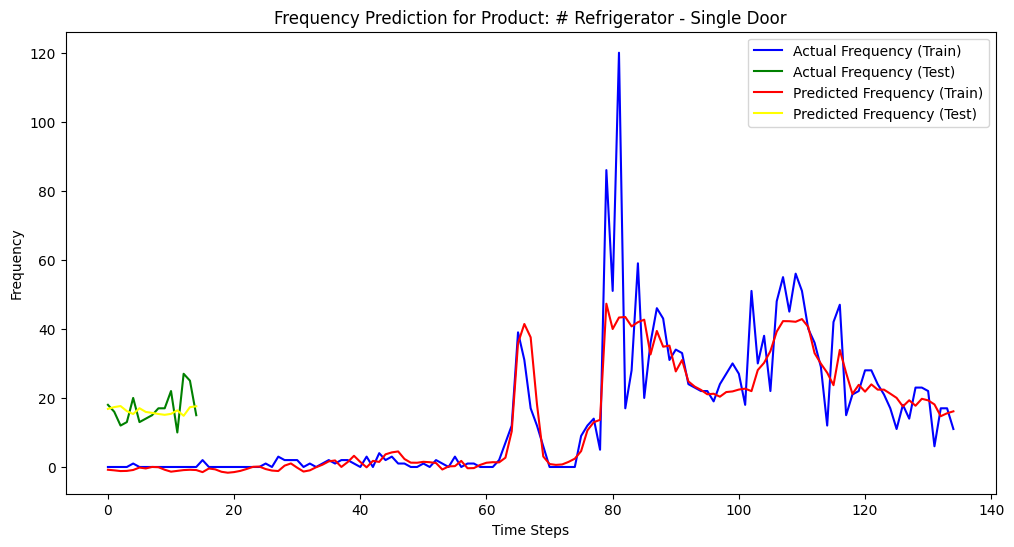

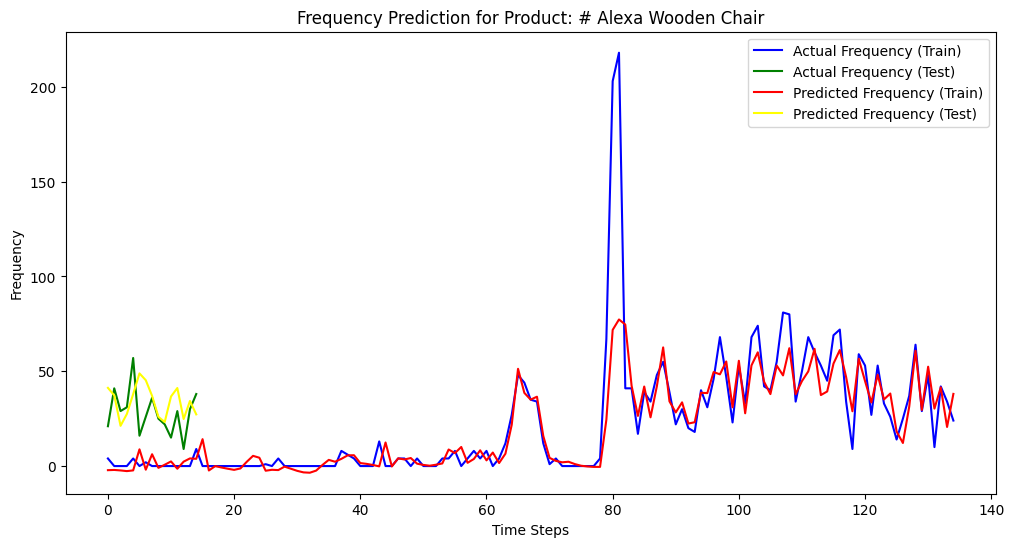

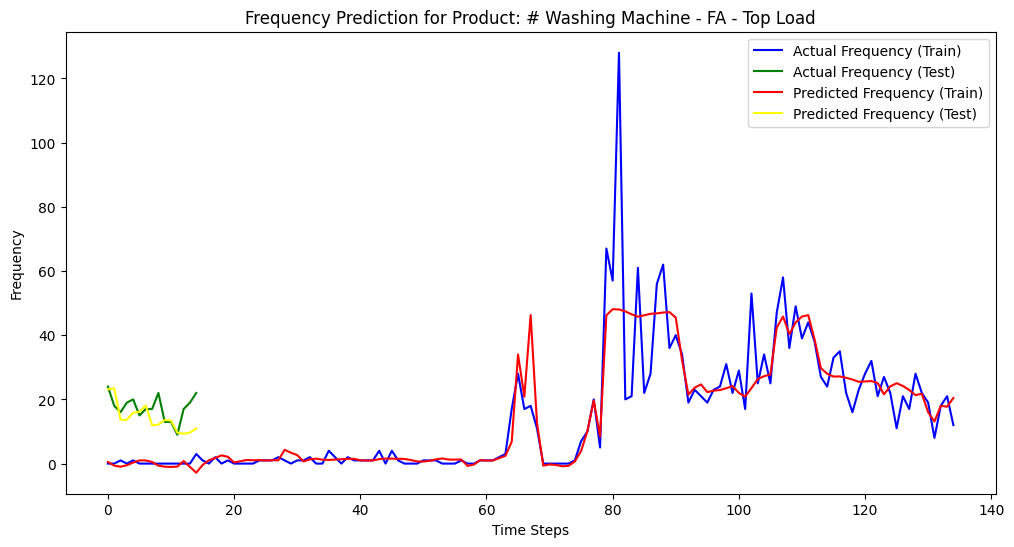

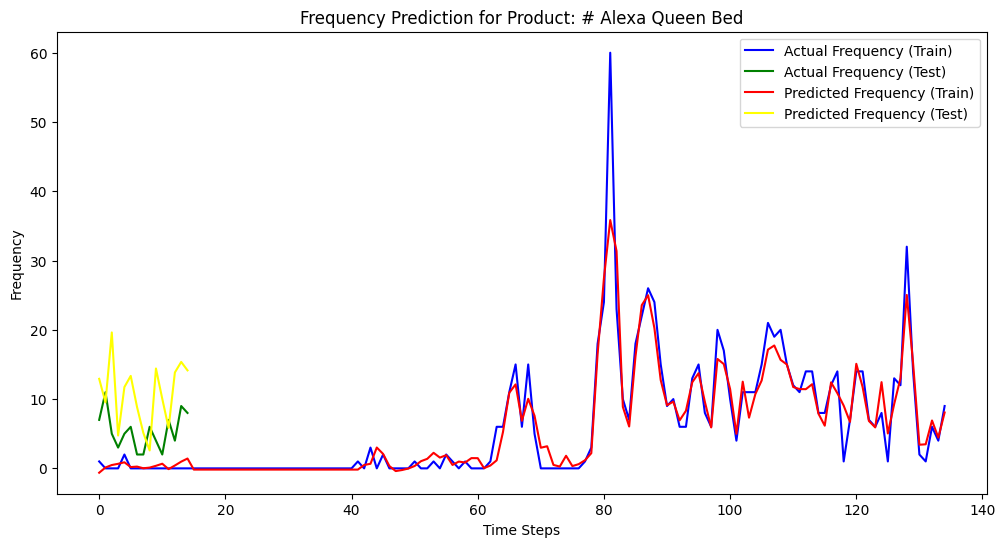

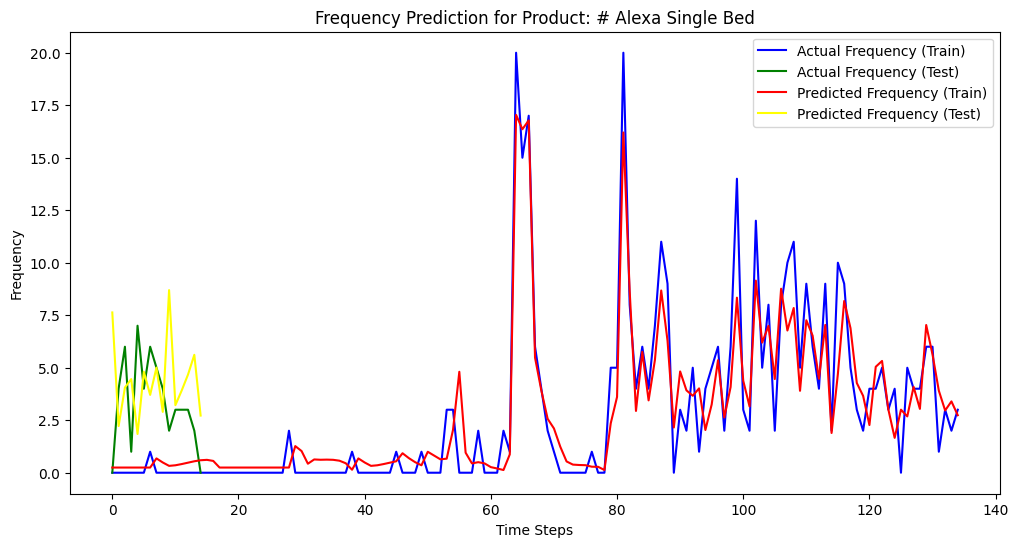

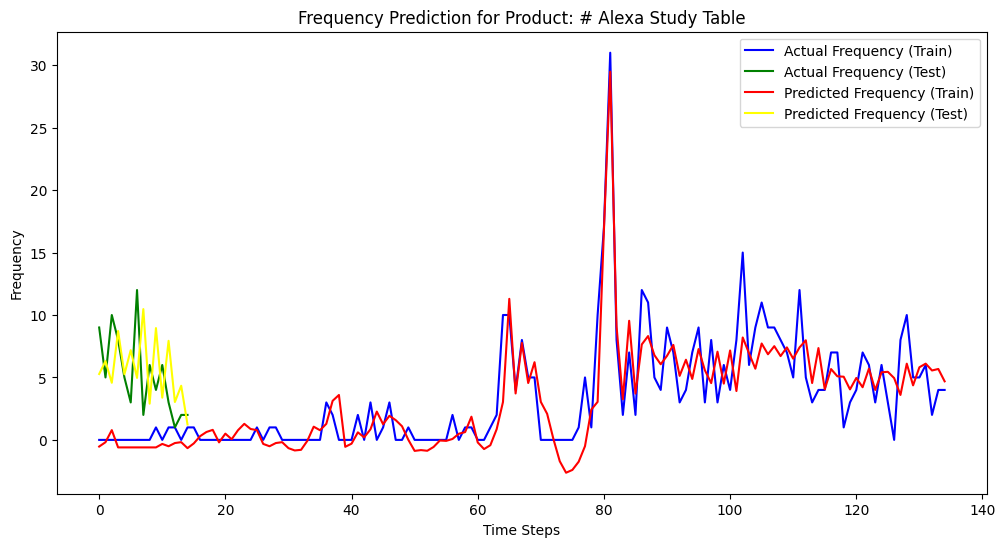

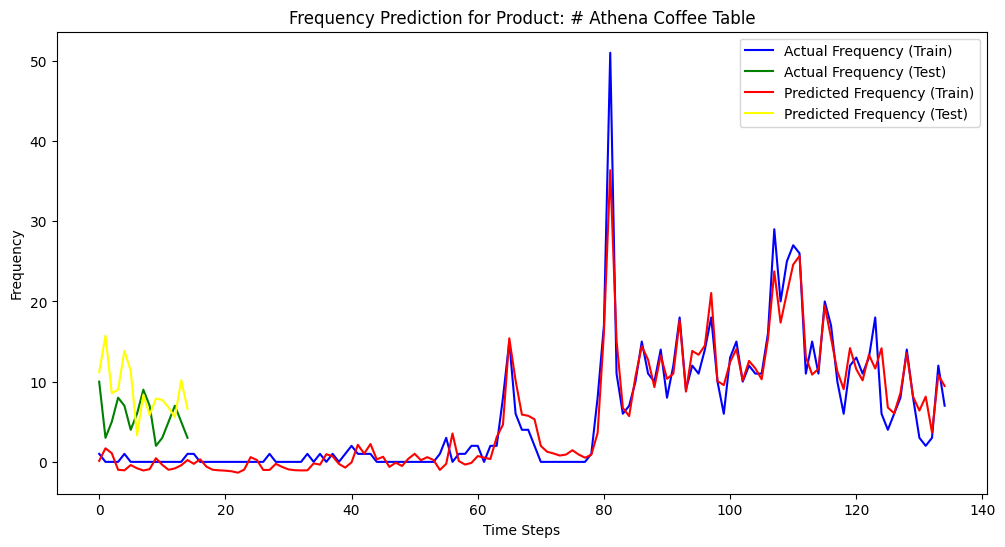

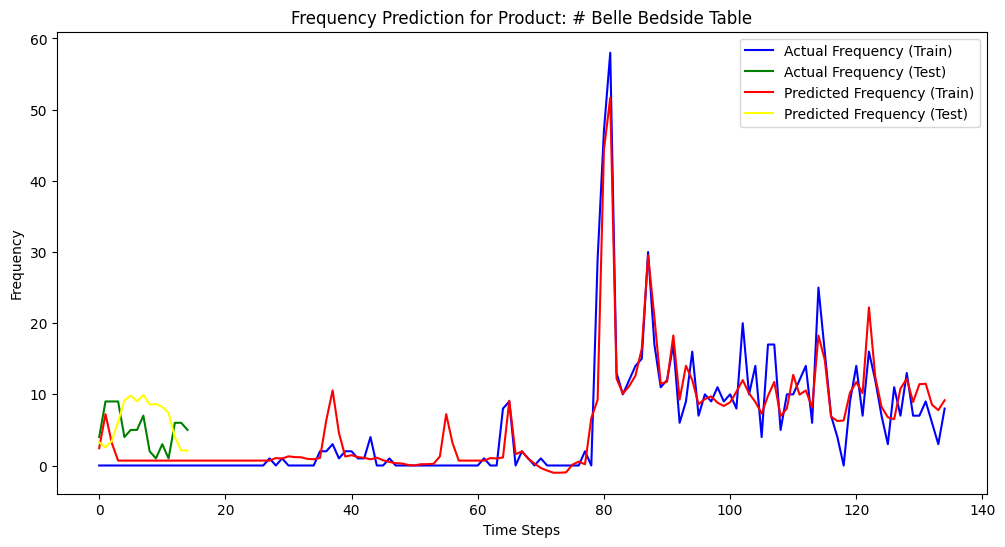

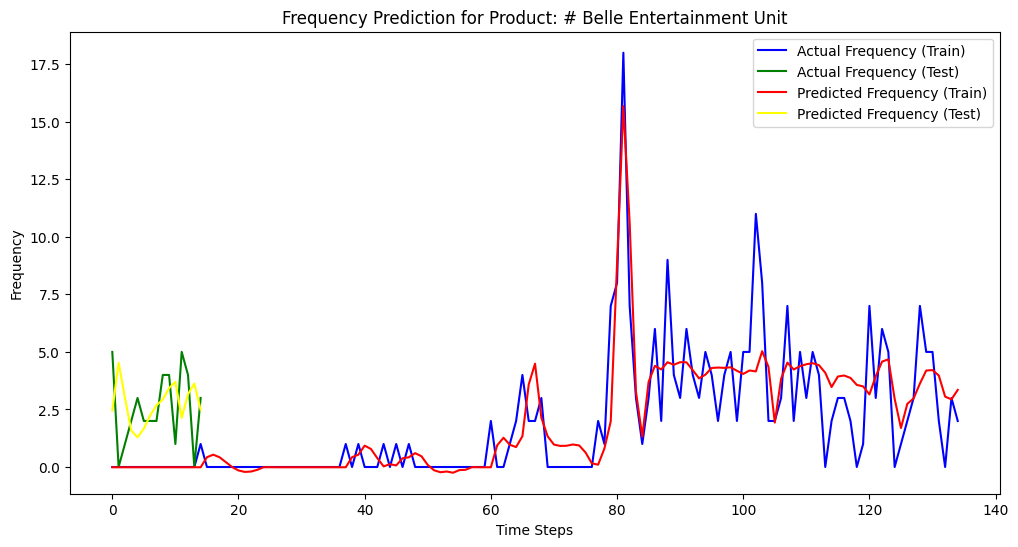

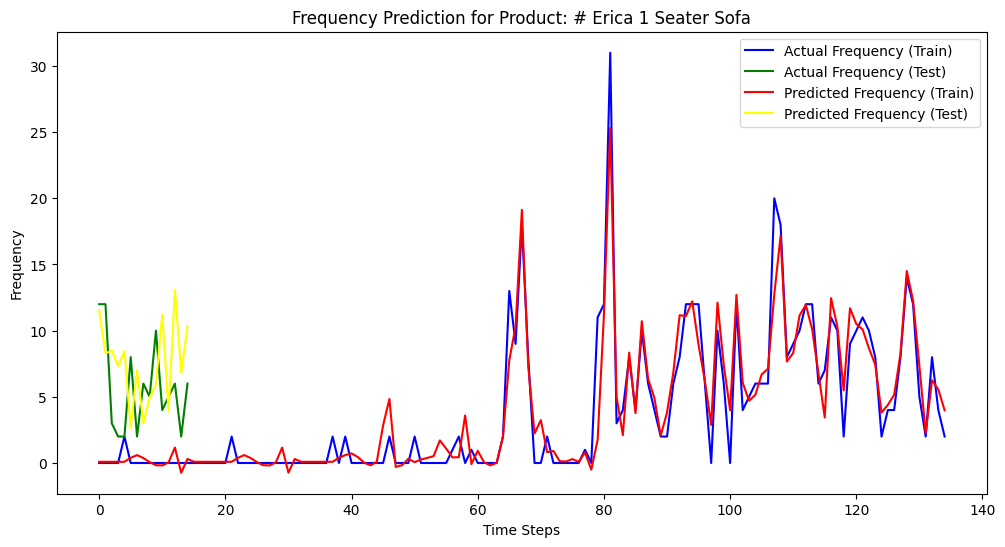

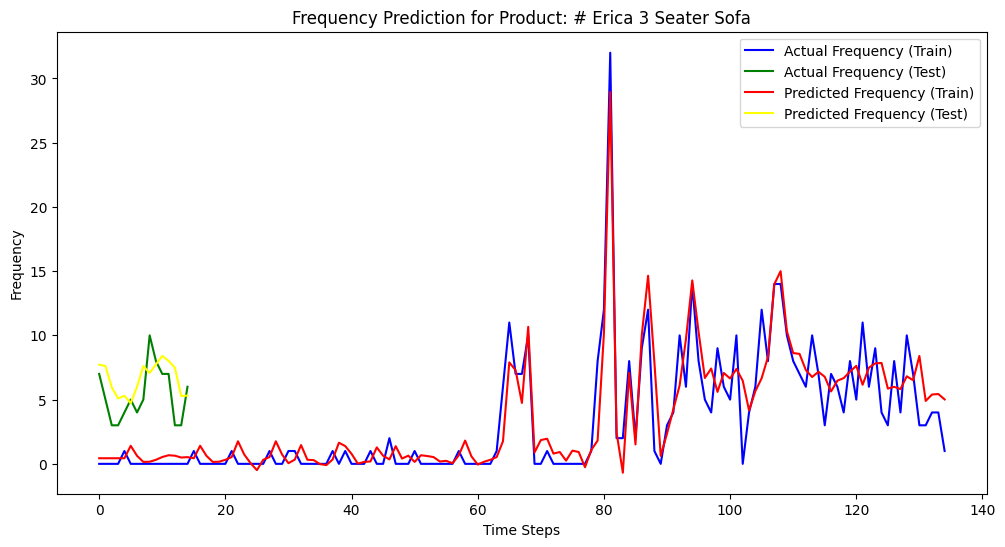

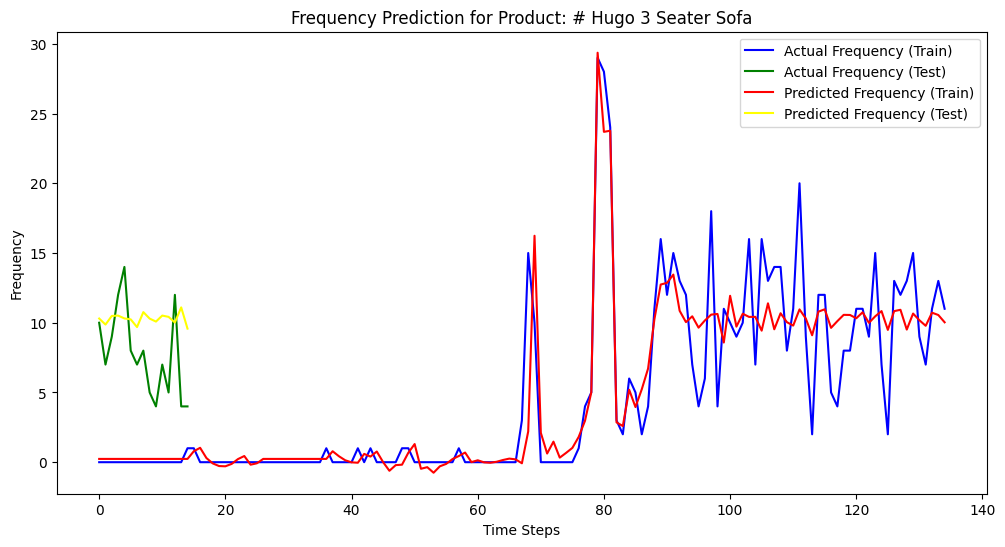

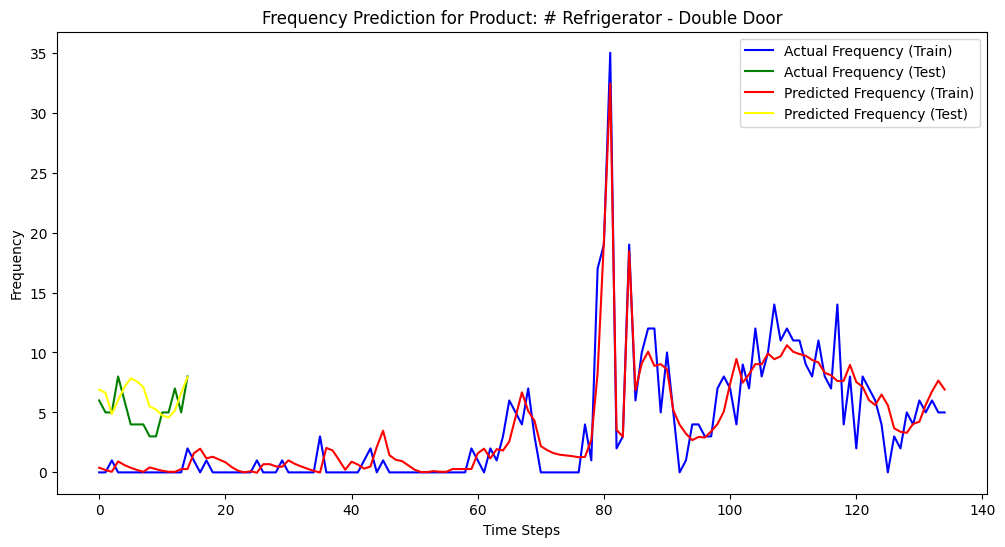

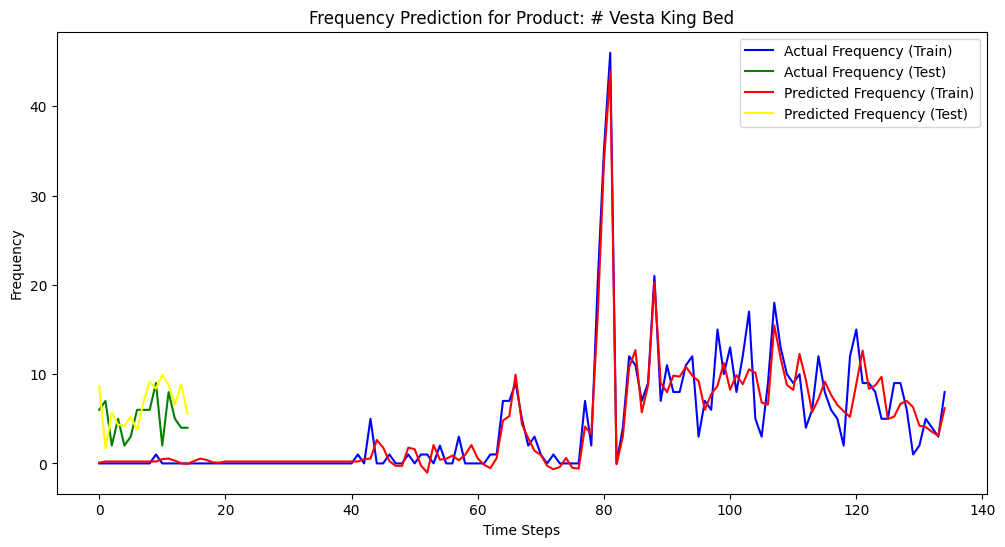

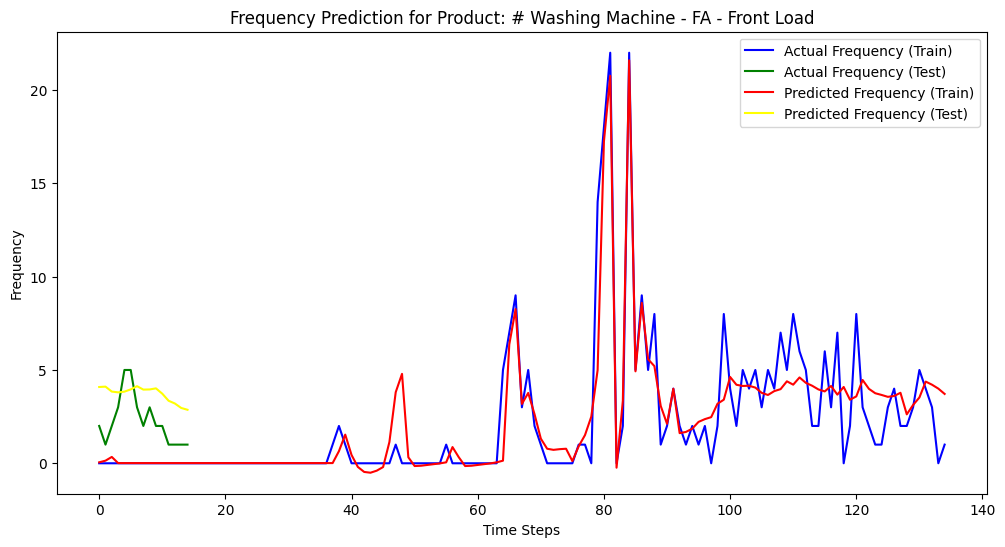

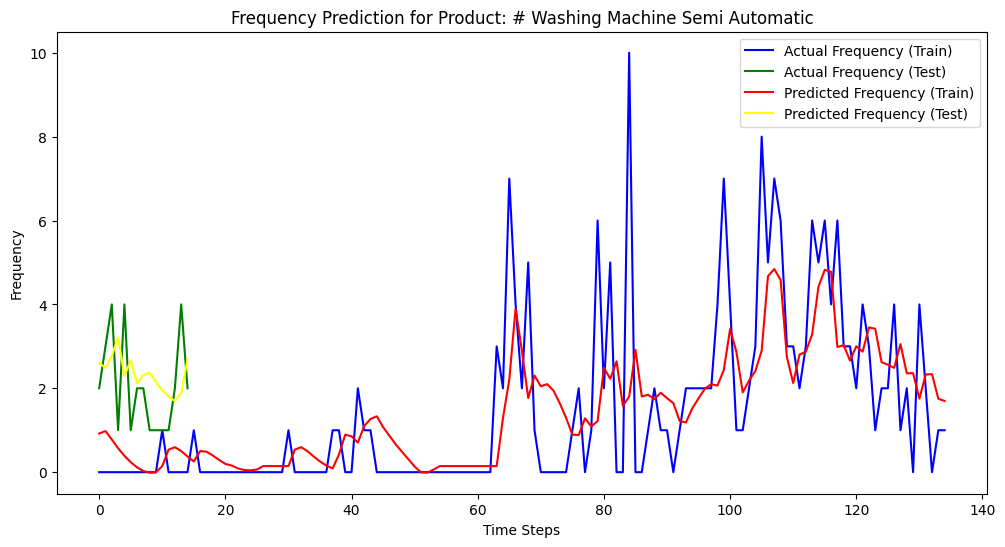

In [ ]:
# prompt: plot the Frequency ,test_predict , train_predict assigned different colors to these three, this error is showing setting an array element with a sequence.

import matplotlib.pyplot as plt

# Iterate through each product's results
for i in range(len(test_train_df)):
    product = test_train_df.loc[i, 'Product']
    train_predict = test_train_df.loc[i, 'train_predict']
    test_predict = test_train_df.loc[i, 'test_predict']
    y_test = test_train_df.loc[i, 'yest']
    y_train = test_train_df.loc[i, 'ytrain']

    # Create a figure
    plt.figure(figsize=(12, 6))

    # Plot the actual frequency
    plt.plot(y_train, label='Actual Frequency (Train)', color='blue')
    plt.plot(y_test, label='Actual Frequency (Test)', color='green')

    # Plot the predicted frequency
    plt.plot(train_predict, label='Predicted Frequency (Train)', color='red')
    plt.plot(test_predict, label='Predicted Frequency (Test)', color='yellow')

    # Add labels and title
    plt.xlabel('Time Steps')
    plt.ylabel('Frequency')
    plt.title(f'Frequency Prediction for Product: {product}')

    # Add legend and show the plot
    plt.legend()
    plt.show()


In [ ]:
# Create a DataFrame to store the forecasted values and MSE for each product
results_df = pd.DataFrame(results)
results_df=results_df.sort_values(by=['Product'])
results_df

,Product,Forecast
3,# Alexa Queen Bed,"[14.14527, 14.131615, 19.07867, 6.4049797, 5.1..."
4,# Alexa Single Bed,"[2.7216718, 3.3880966, 3.41936, 3.2100296, 3.6..."
5,# Alexa Study Table,"[1.233476, 0.9066922, 0.17805518, -1.2579968, ..."
1,# Alexa Wooden Chair,"[27.248405, 43.953465, 32.38421, 38.404835, 28..."
6,# Athena Coffee Table,"[6.5983424, 5.983184, 3.9209144, 8.007874, 16...."
7,# Belle Bedside Table,"[2.108646, 2.2230513, 1.8477784, 1.0316794, 0...."
8,# Belle Entertainment Unit,"[2.4861045, 2.8373733, 3.2094638, 3.462612, 3...."
9,# Erica 1 Seater Sofa,"[10.332331, 12.45527, 10.628705, 6.48271, 2.90..."
10,# Erica 3 Seater Sofa,"[5.3128414, 5.833382, 6.220771, 8.293542, 9.64..."
11,# Hugo 3 Seater Sofa,"[9.57719, 11.496334, 10.217712, 10.355845, 10...."


In [ ]:
forecastedreport=pd.merge(monthfreq, results_df, on='Product')
# Aggregating the lists to single numeric values (mean in this case)
forecastedreport['Forecast'] = forecastedreport['Forecast'].apply(lambda x: sum(x))
forecastedreport.sort_values(by=['Product'])

,month+year,Product,Frequency,Forecast
0,2024-5,# Alexa Queen Bed,29.0,58.934858
1,2024-5,# Alexa Single Bed,6.0,16.353425
2,2024-5,# Alexa Study Table,10.0,-0.507031
3,2024-5,# Alexa Wooden Chair,99.0,170.295034
4,2024-5,# Athena Coffee Table,22.0,41.224021
5,2024-5,# Belle Bedside Table,14.0,7.679115
6,2024-5,# Belle Entertainment Unit,5.0,15.623237
7,2024-5,# Erica 1 Seater Sofa,13.0,42.800455
8,2024-5,# Erica 3 Seater Sofa,15.0,35.308214
9,2024-5,# Hugo 3 Seater Sofa,26.0,52.074087


In [ ]:
forecastedreport.to_excel('MoveOUT_LSTM_weekwise_forecasting_.xlsx', index=False)

In [ ]:
test_data

,month+year,Week,Product,Frequency,month,year
17490,2023-10,2023-10-30,# Washing Machine Semi Automatic,2.0,10,2023
17609,2023-11,2023-11-06,# Washing Machine Semi Automatic,4.0,11,2023
17728,2023-11,2023-11-13,# Washing Machine Semi Automatic,1.0,11,2023
17847,2023-11,2023-11-20,# Washing Machine Semi Automatic,2.0,11,2023
17966,2023-11,2023-11-27,# Washing Machine Semi Automatic,4.0,11,2023
18085,2023-12,2023-12-04,# Washing Machine Semi Automatic,2.0,12,2023
18204,2023-12,2023-12-11,# Washing Machine Semi Automatic,4.0,12,2023
18323,2023-12,2023-12-18,# Washing Machine Semi Automatic,2.0,12,2023
18442,2023-12,2023-12-25,# Washing Machine Semi Automatic,0.0,12,2023
18561,2024-1,2024-01-01,# Washing Machine Semi Automatic,5.0,1,2024


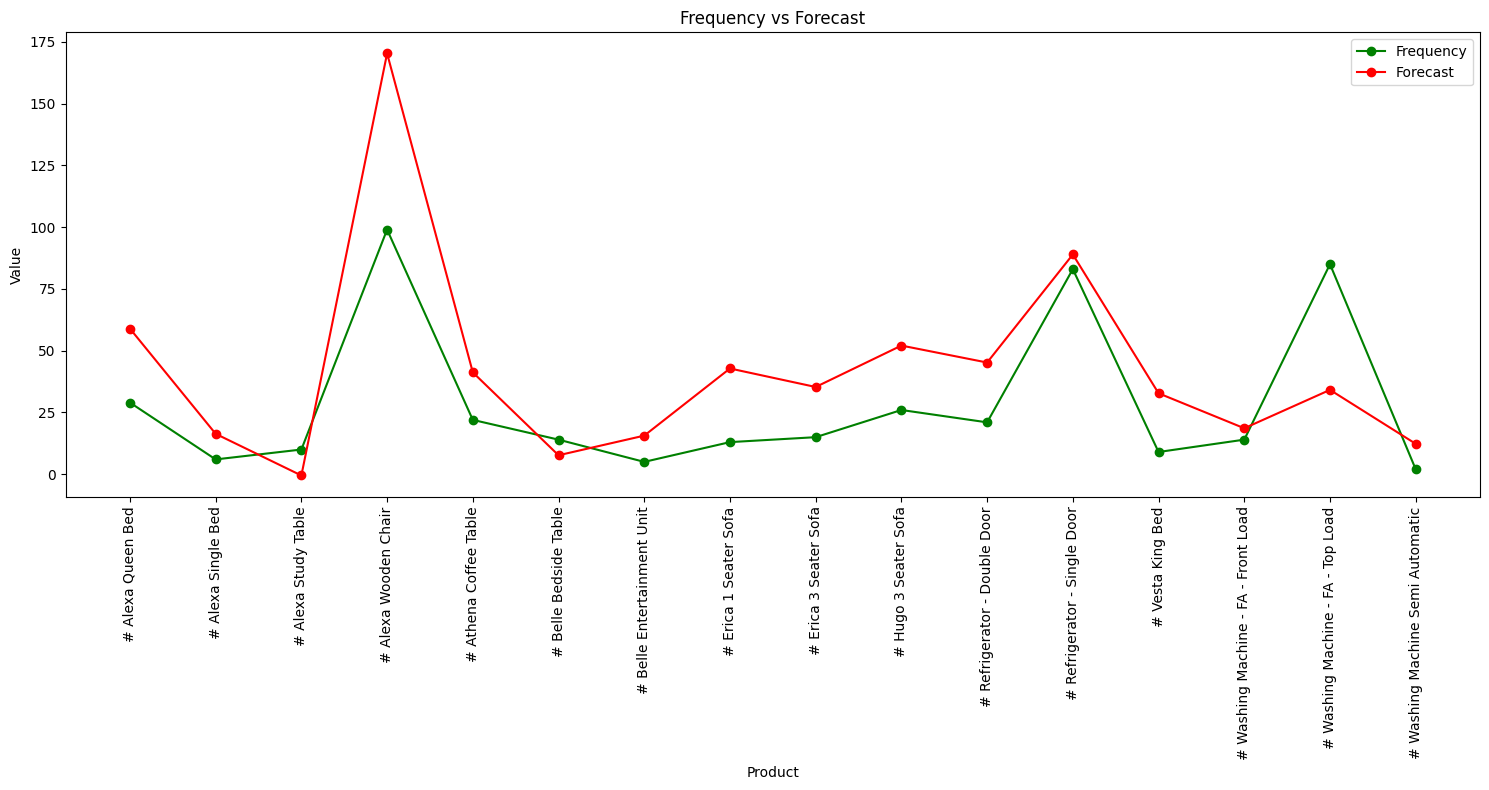

In [ ]:
# prompt: plot line plot between frequency and forecast of forecastedreport , keep red and green color

import matplotlib.pyplot as plt

# Extract data from forecastedreport
product_names = forecastedreport['Product'].tolist()
forecasted_values = forecastedreport['Forecast'].tolist()
frequency_values = forecastedreport['Frequency'].tolist()

# Create the plot
plt.figure(figsize=(15, 8))

# Plot the frequency values
plt.plot(product_names, frequency_values, color='green',marker='o', label='Frequency')

# Plot the forecasted values
plt.plot(product_names, forecasted_values, color='red',marker='o', label='Forecast')

# Add labels and title
plt.xlabel('Product')
plt.ylabel('Value')
plt.title('Frequency vs Forecast')
plt.xticks(rotation=90)

# Add legend and show the plot
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
!pip install keras-tuner
from kerastuner.tuners import RandomSearch
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

def build_model(hp):
    model = Sequential()

    # First LSTM layer with units determined by hp
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32),
                   return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

    # Dropout layer with rate determined by hp
    model.add(Dropout(hp.Float('dropout', 0, 0.5, step=0.1)))

    # Second LSTM layer with units determined by hp
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32),
                   return_sequences=False))

    # Dropout layer with rate determined by hp
    model.add(Dropout(hp.Float('dropout', 0, 0.5, step=0.1)))

    # Output layer
    model.add(Dense(1))

    # Compile the model with learning rate determined by hp
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='mean_squared_error')
    return model

# Define the tuner with RandomSearch
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=6,
    executions_per_trial=3,
    directory='my_dir',
    project_name='lstm_tuning')

# Start the search for the best hyperparameters
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Trial 6 Complete [00h 00m 44s]
val_loss: 1.4382755359013875

Best val_loss So Far: 1.3698906501134236
Total elapsed time: 00h 14m 07s


In [ ]:
# Retrieve the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f"Best number of units in the first LSTM layer: {best_hp.get('units')}")
print(f"Best dropout rate after the first LSTM layer: {best_hp.get('dropout')}")
print(f"Best number of units in the second LSTM layer: {best_hp.get('units')}")
print(f"Best dropout rate after the second LSTM layer: {best_hp.get('dropout')}")
print(f"Best learning rate: {best_hp.get('learning_rate')}")

Best number of units in the first LSTM layer: 512
Best dropout rate after the first LSTM layer: 0.1
Best number of units in the second LSTM layer: 512
Best dropout rate after the second LSTM layer: 0.1
Best learning rate: 0.001
